<a href="https://colab.research.google.com/github/HuiWangCJLU/Model-Ensemble/blob/main/%E4%BD%99%E5%BC%A6%E9%80%80%E7%81%AB%E5%B7%B2%E6%94%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 十四款常规机器学习建模

参考案例一：[module-sklearn.ensemble](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)

参考案例二：[ensemble-plot-feature-transformation](http://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py)


练习步骤为：

- 1、随机准备数据make_classification
- 2、两套模型的训练与基本信息准备
- 3、观察14套模型的准确率与召回率
- 4、刻画14套模型的calibration plots校准曲线
- 5、14套模型的重要性输出
- 6、14套模型的ROC值计算与plot
- 7、加权模型融合数据准备
- 8、基准优化策略：14套模型融合——平均
- 9、加权平均优化策略：14套模型融合——加权平均优化


In [ ]:
# 函数加载


import numpy as np
import sklearn.metrics as metrics
from scipy.optimize import minimize
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def MinimiseOptimize(preds,models_filenames,nb_classes,sample_N,testY,NUM_TESTS = 50):
    '''
    preds ,此时为cifar_100 (6,10000, 100)
    testY,类别列表，100分类，就是：[[1],[2],[3],...],(100,1)
    nb_classesf,分类数,100
    models_filenames模型名称,5
    NUM_TESTS , 迭代次数，默认为20次
    '''
    best_acc = 0.0
    best_rec = 0.0
    best_weights = None
    # Parameters for optimization
    constraints = ({'type': 'eq', 'fun':lambda w: 1 - sum(w)})
    bounds = [(0, 1)] * len(preds)

    # Check for NUM_TESTS times
    for iteration in range(NUM_TESTS):  # NUM_TESTS,迭代次数为25
        # Random initialization of weights
        ii=[]
        prediction_weights = np.random.random(len(models_filenames))

        # Minimise the loss 
        result = minimize(log_loss_func, prediction_weights, method='SLSQP', bounds=bounds, constraints=constraints)

        weights = result['x']
        weighted_predictions = np.zeros((sample_N, nb_classes), dtype='float32')

        # Calculate weighted predictions
        for weight, prediction in zip(weights, preds):
            weighted_predictions += weight * prediction

        yPred = np.argmax(weighted_predictions, axis=1)
        yTrue = testY

        # Calculate weight prediction accuracy
        accuracy = metrics.accuracy_score(yTrue, yPred) * 100
        recall = recall_score(yTrue, yPred)
        tt=confusion_matrix(yTrue, yPred)

        print('\n ------- Iteration : %d  - acc: %s  - rec:%s -------  '%((iteration + 1),accuracy,recall))
        print('    Best Ensemble Weights: \n',result['x'])
        print(tt)
        # Save current best weights
        if recall > 0.9:
          ii=iteration 
        if accuracy > best_acc:
        #if recall > best_rec:
            #best_rec=recall
            best_acc = accuracy
            best_weights = weights
            wh=confusion_matrix(yTrue, yPred)
    return best_acc,best_weights,wh,ii

# Create the loss metric 
def log_loss_func(weights):
    ''' scipy minimize will pass the weights as a numpy array '''
    final_prediction = np.zeros((sample_N, nb_classes), dtype='float32')

    for weight, prediction in zip(weights, preds):
        final_prediction += weight * prediction

    return log_loss(testY_cat, final_prediction)

# calculate accuracy/recall

def calculate_weighted_accuracy(prediction_weights):
    '''计算acc/recall 以及得到预测结果'''
    weighted_predictions = np.zeros((sample_N, nb_classes), dtype='float32')
    for weight, prediction in zip(prediction_weights, preds):
        weighted_predictions += weight * prediction
    yPred = np.argmax(weighted_predictions, axis=1)
    yTrue = testY
    accuracy = metrics.accuracy_score(yTrue, yPred) * 100
    recall = recall_score(yTrue, yPred)
    print("Accuracy : ", accuracy)
    print("Recall : ", recall)
    



## 1、随机准备数据make_classification

In [ ]:
import numpy as np
np.random.seed(10)
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,accuracy_score,recall_score
from sklearn.pipeline import make_pipeline
from sklearn.calibration import calibration_curve
import copy
from sklearn.metrics import confusion_matrix
print(__doc__)
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

def yLabel(y_pred):
    y_pred_f = copy.copy(y_pred)
    y_pred_f[y_pred_f>=0.5] = 1
    y_pred_f[y_pred_f<0.5] = 0
    return y_pred_f

def acc_recall(y_test, y_pred_rf):
    return {'accuracy': accuracy_score(y_test, yLabel(y_pred_rf)), \
            'recall': recall_score(y_test, yLabel(y_pred_rf))}

# 数据制作
#X, y = make_classification(n_samples=10000)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 4000)  # 对半分
#X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
 #                                                           y_train,
 #                                                           test_size=0.2,random_state = 4000)

#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Automatically created module for IPython interactive environment


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
sns.set_style("whitegrid")

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics as ms
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree,linear_model
import graphviz 
import pydotplus
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#sc = StandardScaler()
data2 = pd.read_csv('smote1(1).csv',index_col=None).dropna()
#X_i = data2[['pinc','ins1','ins4','ill','hospexp','illwork']].dropna()
#X_i = data2[['ill','chr','pinc','hospexp','dailyoin','illwork','illpinc','ins4','hosp']].dropna()
X_i = data2[['pinc','ill','chr','hosp','hospexp','illpinc']].dropna()
#X_i = data2[['chr','pinc','hospexp','dailyoin','know','illwork','illpinc','ins1','ins4','hosp','bc']].dropna()
#sc.fit(X_i)
#X = sc.transform(X_i)
X_train = X_i.values
y_train = data2['pfi'].values

In [ ]:
data2 = pd.read_csv('test1(1).csv',index_col=None).dropna()
X_i = data2[['pinc','ill','chr','hosp','hospexp','illpinc']]
#X_i = data2[['ill','chr','pinc','hospexp','dailyoin','illwork','illpinc','ins4','hosp']].dropna()
#X_i = data2[['chr','pinc','hospexp','dailyoin','know','illwork','illpinc','ins1','ins4','hosp','bc']].dropna()
#sc.fit(X_i)
#X = sc.transform(X_i)
X_test = X_i.values
y_test = data2['pfi'].values

In [ ]:
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.4,random_state = 4000)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(412, 6) (459, 6) (412,) (459,)


In [ ]:
len(X_train[1])

20

## 2.1 八款主流机器学习模型

参考 [classifier-comparison](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py)


In [ ]:

h = .02  # step size in the mesh
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
# 去掉"Gaussian Process"，太耗时，是其他的300倍以上

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    #RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

predictEight = {}
for name, clf in zip(names, classifiers):
    predictEight[name] = {}
    predictEight[name]['prob_pos'],predictEight[name]['fpr_tpr'],predictEight[name]['acc_recall'],predictEight[name]['cm'] = [],[],[],[]
    predictEight[name]['importance'] = []
    print('\n --- Start Model : %s ----\n'%name)
    %time clf.fit(X_train, y_train)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        %time prob_pos = clf.decision_function(X_test)
        # # The confidence score for a sample is the signed distance of that sample to the hyperplane.
    else:
        %time prob_pos= clf.predict_proba(X_test)[:, 1]
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        # 需要归一化
    predictEight[name]['prob_pos'] = prob_pos
    
    # 计算ROC、acc、recall
    predictEight[name]['fpr_tpr'] = roc_curve(y_test, prob_pos)[:2]
    predictEight[name]['acc_recall'] = acc_recall(y_test, prob_pos)  # 计算准确率与召回
    predictEight[name]['cm'] = confusion_matrix(y_test, yLabel(prob_pos))
    #confusion_matrix(yTrue, yPred)
    # 提取重要性信息
    if hasattr(clf, "coef_"):
        predictEight[name]['importance'] = clf.coef_
    elif hasattr(clf, "feature_importances_"):
        predictEight[name]['importance'] = clf.feature_importances_
    elif hasattr(clf, "sigma_"):
        predictEight[name]['importance'] = clf.sigma_
        # variance of each feature per class


 --- Start Model : Nearest Neighbors ----

CPU times: user 1.08 ms, sys: 2 µs, total: 1.09 ms
Wall time: 1.09 ms
CPU times: user 2.32 ms, sys: 23 µs, total: 2.34 ms
Wall time: 2.35 ms

 --- Start Model : Linear SVM ----

CPU times: user 1.92 ms, sys: 0 ns, total: 1.92 ms
Wall time: 1.93 ms
CPU times: user 855 µs, sys: 0 ns, total: 855 µs
Wall time: 860 µs

 --- Start Model : RBF SVM ----

CPU times: user 4.85 ms, sys: 0 ns, total: 4.85 ms
Wall time: 4.88 ms
CPU times: user 3.16 ms, sys: 0 ns, total: 3.16 ms
Wall time: 3.19 ms

 --- Start Model : Decision Tree ----

CPU times: user 798 µs, sys: 0 ns, total: 798 µs
Wall time: 806 µs
CPU times: user 240 µs, sys: 0 ns, total: 240 µs
Wall time: 244 µs

 --- Start Model : Neural Net ----

CPU times: user 480 ms, sys: 423 ms, total: 903 ms
Wall time: 464 ms
CPU times: user 1.58 ms, sys: 0 ns, total: 1.58 ms
Wall time: 799 µs

 --- Start Model : AdaBoost ----

CPU times: user 130 ms, sys: 99.7 ms, total: 230 ms
Wall time: 117 ms
CPU times: us

In [ ]:
predictEight[name]['cm']

array([[388,  43],
       [  8,  20]])

## 2.2 组合模型延伸

参考官网[feature-transformation](http://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py)



In [ ]:
n_estimator = 100

'''
model 0 : lm
logistic
'''
print('LM 开始计算...')
lm = LogisticRegression()
%time lm.fit(X_train, y_train)
y_pred_lm = lm.predict_proba(X_test)[:, 1]
fpr_lm, tpr_lm, _ = roc_curve(y_test, y_pred_lm)
lm_ar = acc_recall(y_test, y_pred_lm)  # 计算准确率与召回
lm_cm = confusion_matrix(y_test,yLabel(y_pred_lm))

'''
model 1 : rt + lm
无监督变换 + lg
'''
# Unsupervised transformation based on totally random trees
print('随机森林编码+LM 开始计算...')
rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator,
    random_state=0)
# 数据集的无监督变换到高维稀疏表示。

rt_lm = LogisticRegression()
pipeline = make_pipeline(rt, rt_lm)
%time pipeline.fit(X_train, y_train)
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred_rt)
rt_lm_ar = acc_recall(y_test, y_pred_rt)  # 计算准确率与召回
rt_lm_cm = confusion_matrix(y_test,yLabel(y_pred_rt))

'''
model 2 : RF / RF+LM
'''
print('\n 随机森林系列 开始计算... ')
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression()
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))  # rf.apply(X_train)-(1310, 100)     X_train-(1310, 20)
# 用100棵树的信息作为X，载入做LM模型
%time rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)
y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)
rf_lm_ar = acc_recall(y_test, y_pred_rf_lm)  # 计算准确率与召回
rf_lm_cm

'''
model 2 : GRD / GRD + LM
'''
print('\n 梯度提升树系列 开始计算... ')
grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression()
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
%time grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)
grd_lm_ar = acc_recall(y_test, y_pred_grd_lm)  # 计算准确率与召回

# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)
grd_ar = acc_recall(y_test, y_pred_grd)  # 计算准确率与召回

# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
rf_ar = acc_recall(y_test, y_pred_rf)  # 计算准确率与召回

LM 开始计算...
CPU times: user 7.89 ms, sys: 24 µs, total: 7.91 ms
Wall time: 12 ms
随机森林编码+LM 开始计算...
CPU times: user 224 ms, sys: 0 ns, total: 224 ms
Wall time: 232 ms

 随机森林系列 开始计算... 
CPU times: user 67 ms, sys: 0 ns, total: 67 ms
Wall time: 67 ms

 梯度提升树系列 开始计算... 
CPU times: user 53 ms, sys: 0 ns, total: 53 ms
Wall time: 53.4 ms


## 3、观察14套模型的准确率与召回率

In [ ]:
print('----- 第一套,8款常规机器学习模型 -----')
for x,y in predictEight.items():
    print('\n ----- The Model  : %s , -----\n '%(x)  )
    print(predictEight[x]['cm'])

print('\n ----- 第二套,6款组合机器学习模型 -----\n ')
names = ['LM','LM + RT','LM + RF','GBT + LM','GBT','RF']
ar_list = [lm_ar,rt_lm_ar,rf_lm_ar,grd_lm_ar,grd_ar,rf_ar]
for x,y in zip(names,ar_list):
    print('\n --- %s 准确率与召回为: ---- \n '%x,y)

----- 第一套,8款常规机器学习模型 -----

 ----- The Model  : Nearest Neighbors , -----
 
[[388  43]
 [  2  26]]

 ----- The Model  : Linear SVM , -----
 
[[400  31]
 [  2  26]]

 ----- The Model  : RBF SVM , -----
 
[[414  17]
 [ 19   9]]

 ----- The Model  : Decision Tree , -----
 
[[390  41]
 [  2  26]]

 ----- The Model  : Neural Net , -----
 
[[370  61]
 [  1  27]]

 ----- The Model  : AdaBoost , -----
 
[[431   0]
 [ 28   0]]

 ----- The Model  : Naive Bayes , -----
 
[[380  51]
 [  7  21]]

 ----- The Model  : QDA , -----
 
[[388  43]
 [  8  20]]

 ----- 第二套,6款组合机器学习模型 -----
 

 --- LM 准确率与召回为: ---- 
  {'accuracy': 0.8997821350762527, 'recall': 0.9642857142857143}

 --- LM + RT 准确率与召回为: ---- 
  {'accuracy': 0.9193899782135077, 'recall': 0.7857142857142857}

 --- LM + RF 准确率与召回为: ---- 
  {'accuracy': 0.9302832244008714, 'recall': 0.9642857142857143}

 --- GBT + LM 准确率与召回为: ---- 
  {'accuracy': 0.9433551198257081, 'recall': 0.8571428571428571}

 --- GBT 准确率与召回为: ---- 
  {'accuracy': 0.932461873

## 4、刻画14套模型的calibration plots校准曲线


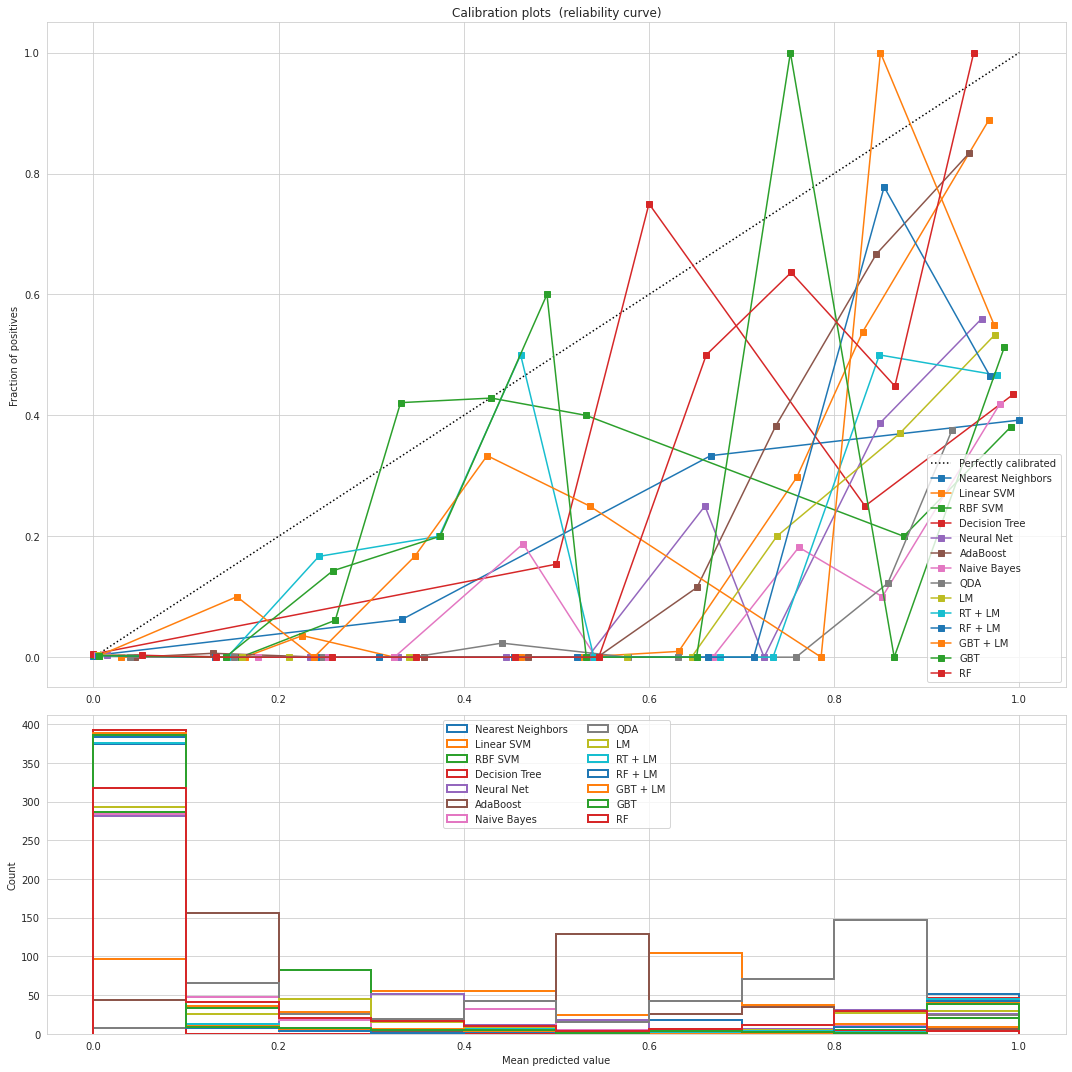

In [ ]:
# #############################################################################
# Plot calibration plots
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

plt.figure(figsize=(15, 15))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for prob_pos, name in [[predictEight[n]['prob_pos'],n] for n in names] + [(y_pred_lm,'LM'),
                       (y_pred_rt,'RT + LM'),
                       (y_pred_rf_lm,'RF + LM'),
                       (y_pred_grd_lm,'GBT + LM'),
                       (y_pred_grd,'GBT'),
                       (y_pred_rf,'RF')]:
    
    prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

## 5、14套模型的重要性输出


In [ ]:
# 重要性
print('\n -------- RadomFree importances ------------\n')
print(rf.feature_importances_)
print('\n -------- GradientBoosting importances ------------\n')
print(grd.feature_importances_)
print('\n -------- Logistic Coefficient  ------------\n')
print(lm.coef_ )


# 其他几款模型的特征选择
eight_names = list(predictEight.keys())
[[predictEight[n]['importance'],n] for n in eight_names if predictEight[n]['importance'] != [] ]


 -------- RadomFree importances ------------

[0.61893491 0.13089691 0.05678842 0.03594066 0.12804096 0.02939813]

 -------- GradientBoosting importances ------------

[0.76674862 0.01861718 0.01147545 0.00175094 0.19001802 0.01138979]

 -------- Logistic Coefficient  ------------

[[-3.46226549  0.87283827 -0.23399285  0.11148509  1.1509618   0.23530056]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


[[array([[-1.15908784e+00,  9.36513819e-02, -1.13150724e-04,
           1.24050092e-04,  3.19025352e-01,  3.19236372e-02]]), 'Linear SVM'],
 [array([0.74290698, 0.03512183, 0.00825908, 0.00840016, 0.19237395,
         0.012938  ]), 'Decision Tree'],
 [array([0.22, 0.2 , 0.18, 0.04, 0.18, 0.18]), 'AdaBoost'],
 [array([[2.27239843, 0.18810241, 0.37303088, 0.15290906, 1.48012789,
          0.38269271],
         [0.33787321, 0.3329088 , 0.5132386 , 0.19284624, 4.11998416,
          0.45195575]]), 'Naive Bayes']]

## 6、14套模型的ROC值计算与plot


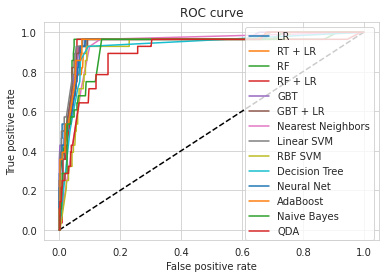

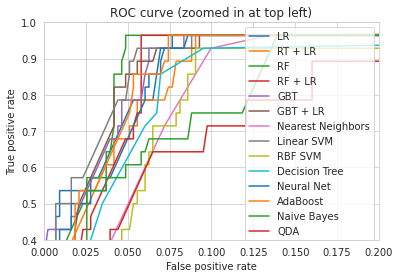

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lm, tpr_lm, label='LR')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
# 8 款模型
for (fpr,tpr),name in [[predictEight[n]['fpr_tpr'],n] for n in eight_names] :
    plt.plot(fpr, tpr, label=name)
    

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.4, 1)     # ylim改变     # matt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lm, tpr_lm, label='LR')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
for (fpr,tpr),name in [[predictEight[n]['fpr_tpr'],n] for n in eight_names] :
    plt.plot(fpr, tpr, label=name)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

## optimize

    借助快照集成，参考：(titu1994/Snapshot-Ensembles)[https://github.com/titu1994/Snapshot-Ensembles]


## 7、加权模型融合数据准备


In [ ]:
#from MinimiseOptimize import MinimiseOptimize,log_loss_func,calculate_weighted_accuracy

# 集成数据准备
preds_dict = {}
for pred_tmp,name in [[predictEight[n]['prob_pos'],n] for n in names] + [(y_pred_lm,'LM'),
                       (y_pred_rt,'RT + LM'),
                       (y_pred_rf_lm,'RF + LM'),
                       (y_pred_grd_lm,'GBT + LM'),
                       (y_pred_grd,'GBT'),
                       (y_pred_rf,'RF')]:
    preds_dict[name] = np.array([1 - pred_tmp , pred_tmp]).T

# 参数准备
preds = list(preds_dict.values())
models_filenames = list(preds_dict.keys())  # 模型个数
sample_N,nb_classes = preds[0].shape  # 样本数/分类数
testY = y_test.reshape((len(y_test),1))  # 真实Label (2000,1)
testY_cat = np.array([1 - y_test ,y_test]).T # (2000,2)   

In [ ]:
models_filenames

['Nearest Neighbors',
 'Linear SVM',
 'RBF SVM',
 'Decision Tree',
 'Neural Net',
 'AdaBoost',
 'Naive Bayes',
 'QDA',
 'LM',
 'RT + LM',
 'RF + LM',
 'GBT + LM',
 'GBT',
 'RF']

## 8、基准优化策略：14套模型融合——平均


In [ ]:
# 模型集成：无权重
    # 无权重则代表权重为平均值
    
    
prediction_weights = [1. / len(models_filenames)] * len(models_filenames)
calculate_weighted_accuracy(prediction_weights)

Accuracy :  91.93899782135077
Recall :  0.8571428571428571


## 9、加权平均优化策略：14套模型融合——加权平均优化

In [ ]:
# 模型集成：附权重
best_acc,best_weights,hh,it = MinimiseOptimize(preds,models_filenames,nb_classes,sample_N,testY,NUM_TESTS = 50)


 ------- Iteration : 1  - acc: 92.81045751633987  - rec:0.35714285714285715 -------  
    Best Ensemble Weights: 
 [4.26541868e-07 1.09492254e-05 2.76214672e-01 1.35148610e-05
 6.37132119e-06 2.78667785e-01 7.13038914e-02 0.00000000e+00
 6.97863730e-06 4.25531562e-21 1.14023459e-05 1.45945228e-02
 1.97399989e-01 1.61769497e-01]
[[416  15]
 [ 18  10]]

 ------- Iteration : 2  - acc: 94.11764705882352  - rec:0.9642857142857143 -------  
    Best Ensemble Weights: 
 [1.30827691e-02 3.03246631e-15 1.21048600e-02 8.96891192e-02
 8.66085782e-07 4.52385826e-03 7.57829585e-02 0.00000000e+00
 2.83072702e-16 2.62361963e-01 1.48930191e-01 6.46532980e-02
 7.65139702e-02 2.52356147e-01]
[[405  26]
 [  1  27]]

 ------- Iteration : 3  - acc: 92.81045751633987  - rec:0.6785714285714286 -------  
    Best Ensemble Weights: 
 [2.66874014e-17 1.50666715e-05 2.02182744e-01 6.16915943e-06
 1.52864724e-01 1.44037053e-01 5.61629133e-02 3.36390193e-02
 3.60378398e-03 8.03743849e-02 5.65497627e-03 2.64739720

In [ ]:
it

[]

In [ ]:
# 附权重的最终结果展示
print("Best Accuracy : ", best_acc)
print("Best Weights : ", best_weights)
print("Best matrix : ", hh)
calculate_weighted_accuracy(best_weights)

Best Accuracy :  96.07843137254902
Best Weights :  [7.13071357e-17 2.67622905e-01 5.30470285e-02 5.16109882e-20
 2.73362082e-17 6.79330066e-01 0.00000000e+00 0.00000000e+00
 8.58151035e-17 1.69924255e-18 0.00000000e+00 0.00000000e+00
 8.85655989e-21 1.18143082e-16]
Best matrix :  [[429   2]
 [ 16  12]]
Accuracy :  96.07843137254902
Recall :  0.42857142857142855
